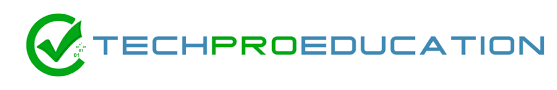

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
#any plots generated will be displayed within the notebook itself

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df = pd.read_csv("store_sharing.csv")
# if the dataset is not in the same folder, we cannot read the dataset by simply writing the name of the dataset,
# instead we must write the path along with the name of the dataset.

df.head(5)
# humidity is in percentage: it represents the relative amount of moisture present in the air compared to the 
# maximum amount of moisture the air can hold at a particular temperature.

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,1/4/2015 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,1/4/2015 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,1/4/2015 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,1/4/2015 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [3]:
df.info()
# the data type of timestamp must be date_time, we can convert it by pd.to_datetime if needed be.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

#### 3a. missing or null values

In [5]:
df.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
# df.isna().sum()[df.isna().sum() > 0]

#### 3b. duplicated rows or not

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
# df.drop_duplicates(keep='last', inplace=True) - Keep the last occurrence of each duplicated row
# df.drop_duplicates(inplace=True) - We can drop the duplicated rows.
# df.reset_index(drop=True, inplace=True) - After removing duplicated rows, the index may have gaps. 

In [11]:
df.head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3


<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)
</span>


In [12]:
df['season'].replace(1.0, 'Summer', inplace=True)
df['season'].replace(2.0, 'Fall', inplace=True)
df['season'].replace(3.0, 'Winter', inplace=True)
df['season'].replace(0.0, 'Spring', inplace=True)
df['is_holiday'].replace(1.0, 'Holiday', inplace=True)
df['is_holiday'].replace(0.0, 'Non-holiday', inplace=True)
df['is_weekend'].replace(1.0, 'Weekend', inplace=True)
df['is_weekend'].replace(0.0, 'Non-weekend', inplace=True)
df['weather_code'].replace(1.0, 'Clear', inplace=True)
df['weather_code'].replace(2.0, 'scattered clouds', inplace=True)
df['weather_code'].replace(3.0, 'Broken clouds', inplace=True)
df['weather_code'].replace(4.0, 'Cloudy', inplace=True)
df['weather_code'].replace(7.0, 'Rain', inplace=True)
df['weather_code'].replace(10.0, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26.0, 'snowfall', inplace=True)
df['weather_code'].replace(94.0, 'Freezing Fog', inplace=True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5


In [14]:
df.head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter


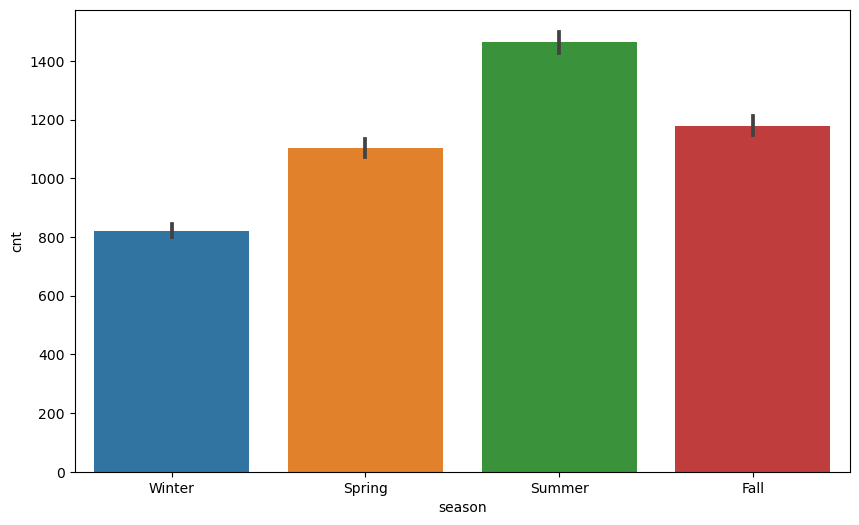

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="season", y="cnt")
plt.show();

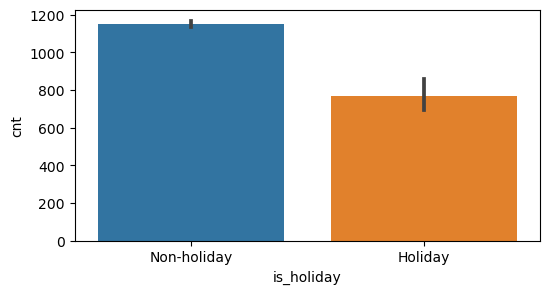

In [16]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x="is_holiday", y="cnt");

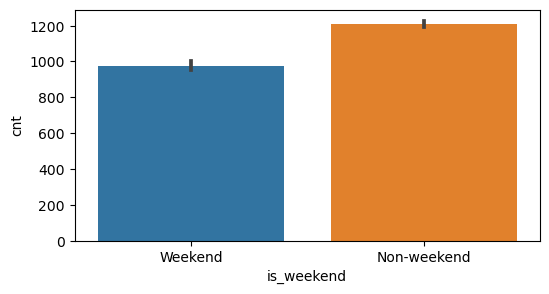

In [17]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x="is_weekend", y="cnt");

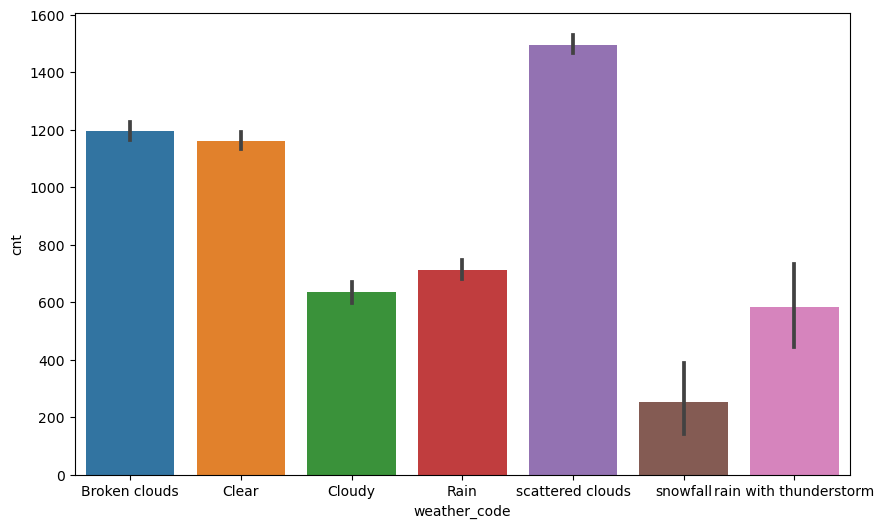

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="weather_code", y="cnt")
plt.show();

In [19]:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [20]:
# Look at the data type of each variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  object 
 7   is_holiday    17414 non-null  object 
 8   is_weekend    17414 non-null  object 
 9   season        17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [21]:
# transform timestamp in type
df.timestamp = pd.to_datetime(df.timestamp)

In [22]:
# set it as index
df.set_index("timestamp", inplace = True)

In [23]:
df.tail(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,Cloudy,Non-holiday,Non-weekend,Winter
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,scattered clouds,Non-holiday,Non-weekend,Winter


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

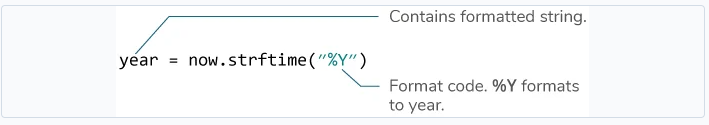

What is Feature Engineering?
- Creating new Features(Columns or Fields)
- Handling missing values
- Feature selection
- Feature modification
- and more https://www.heavy.ai/technical-glossary/feature-engineering#:~:text=Feature%20engineering%20refers%20to%20the,machine%20learning%20or%20statistical%20modeling.

In [24]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter


In [25]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [26]:
df['year'] = df.index.strftime("%Y") # df1["year"] = df1.index.year

In [27]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year
timestamp,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015


https://www.programiz.com/python-programming/datetime/strftime

In [28]:
df['hour'] = df.index.hour # df['hour'] = df.index.strftime("%H")
df['day_of_week'] = df.index.day_name() # df['dayofweek'] = df.index.strftime("%A")
df['day_of_month'] = df.index.day # df['day'] = df.index.strftime("%d")
df['month'] = df.index.month # df['month'] = df.index.strftime("%m")
df['quarter'] = df.index.quarter # df['quarter'] = df.index.strftime("%q")
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015,1,Sunday,4,1,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter,2015,2,Sunday,4,1,1


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

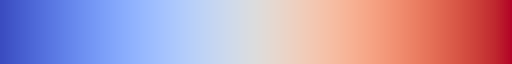

In [29]:
sns.color_palette("coolwarm", as_cmap = True)

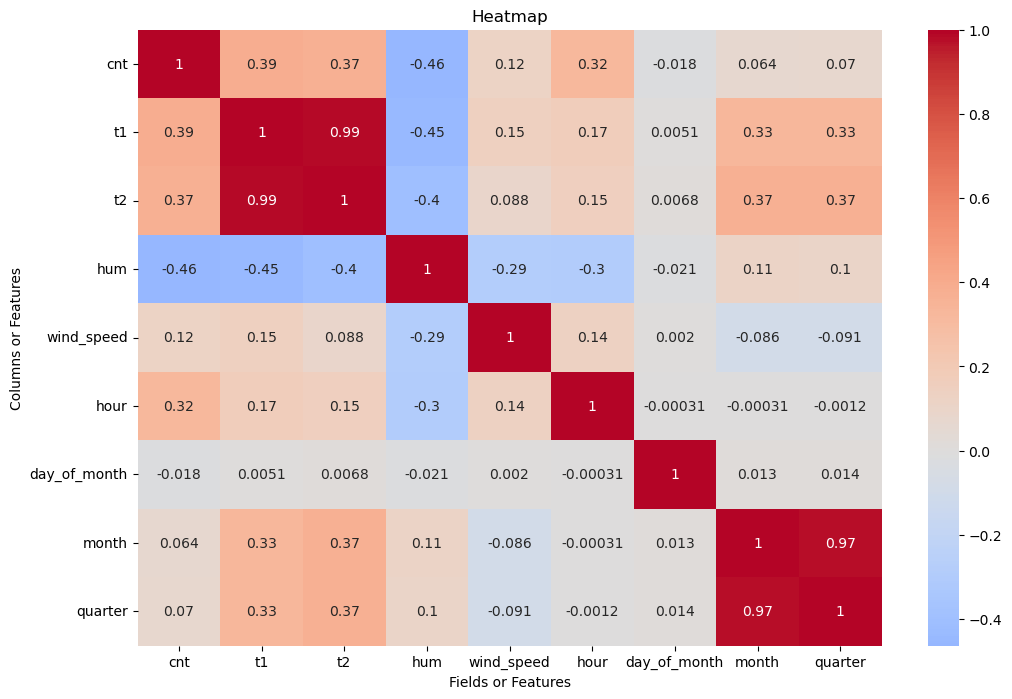

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, ax=ax,cmap = "coolwarm",center = - 0.01)

ax.set_title("Heatmap")
ax.set_xlabel("Fields or Features")
ax.set_ylabel("Columns or Features")

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

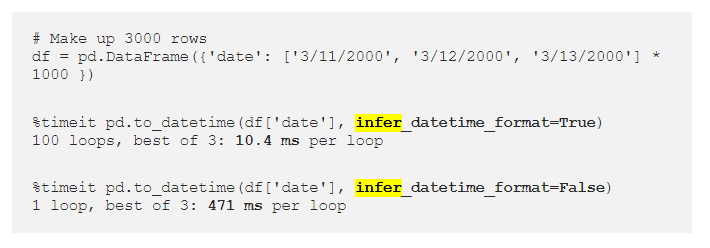

In [31]:
# first correlate
# second target correlate
# target correlate with other features
# visualize

In [32]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter
timestamp,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1


In [33]:
# first correlate

In [34]:
df.corr()
# Correlation, in simple terms, refers to a statistical measure that helps us understand the relationship between two variables. 
# It tells us how closely related or connected those variables are.

,cnt,t1,t2,hum,wind_speed,hour,day_of_month,month,quarter
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,0.324423,-0.017887,0.063757,0.069652
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,0.168708,0.005072,0.332712,0.333823
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,0.153956,0.006791,0.368366,0.369212
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,-0.295653,-0.020868,0.113149,0.104825
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.141792,0.002040,-0.086383,-0.090727
hour,0.324423,0.168708,0.153956,-0.295653,0.141792,1.000000,-0.000310,-0.000312,-0.001171
day_of_month,-0.017887,0.005072,0.006791,-0.020868,0.002040,-0.000310,1.000000,0.012614,0.013956
month,0.063757,0.332712,0.368366,0.113149,-0.086383,-0.000312,0.012614,1.000000,0.971525
quarter,0.069652,0.333823,0.369212,0.104825,-0.090727,-0.001171,0.013956,0.971525,1.000000


In [35]:
# second target correlate

In [36]:
df.corr().cnt

cnt             1.000000
t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
hour            0.324423
day_of_month   -0.017887
month           0.063757
quarter         0.069652
Name: cnt, dtype: float64

In [37]:
# target correlate with other features

In [38]:
target_corr = df.corr().cnt.drop('cnt')

In [39]:
target_corr # correlateion vs category.Change the type of categorical columns to str, 
# as they don't tend to make any difference in correlation,
# we can check the correlation of categorical datas among themselves.

t1              0.388798
t2              0.369035
hum            -0.462901
wind_speed      0.116295
hour            0.324423
day_of_month   -0.017887
month           0.063757
quarter         0.069652
Name: cnt, dtype: float64

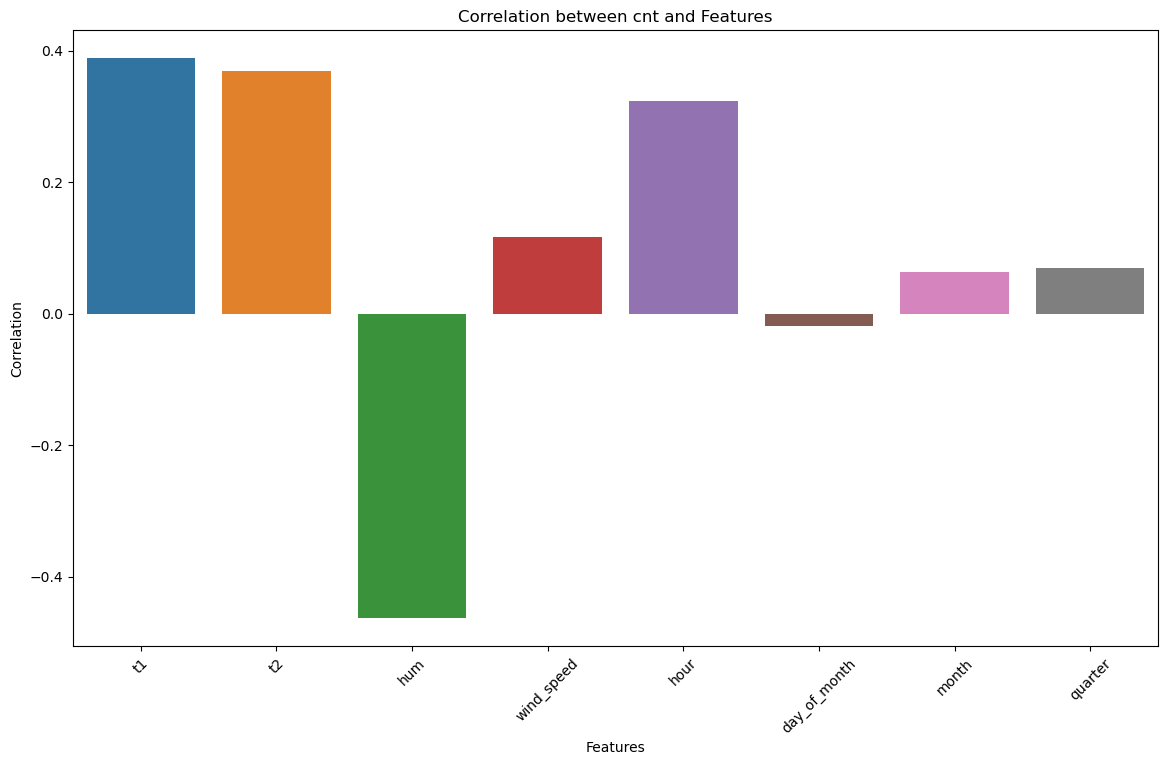

In [40]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

In [41]:
target_corr = target_corr.sort_values(ascending=False)

In [42]:
# visualize

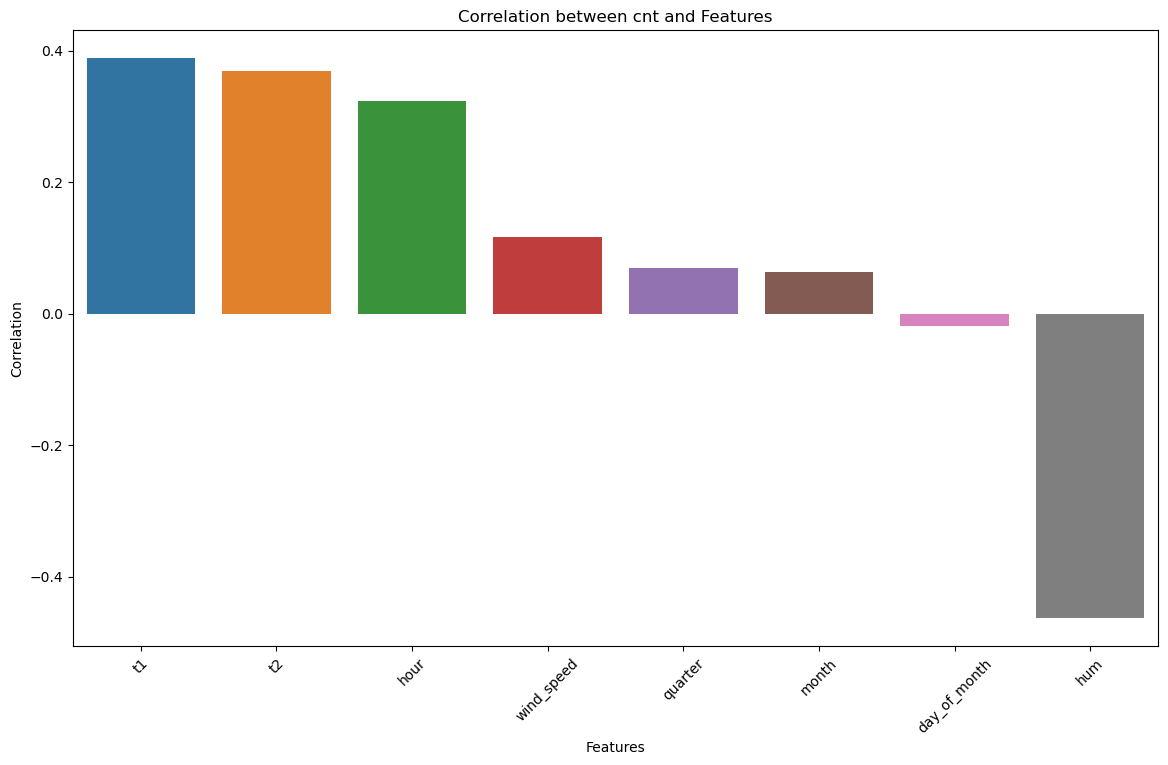

In [43]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

In [44]:
# use sns line plot

In [45]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter
timestamp,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1


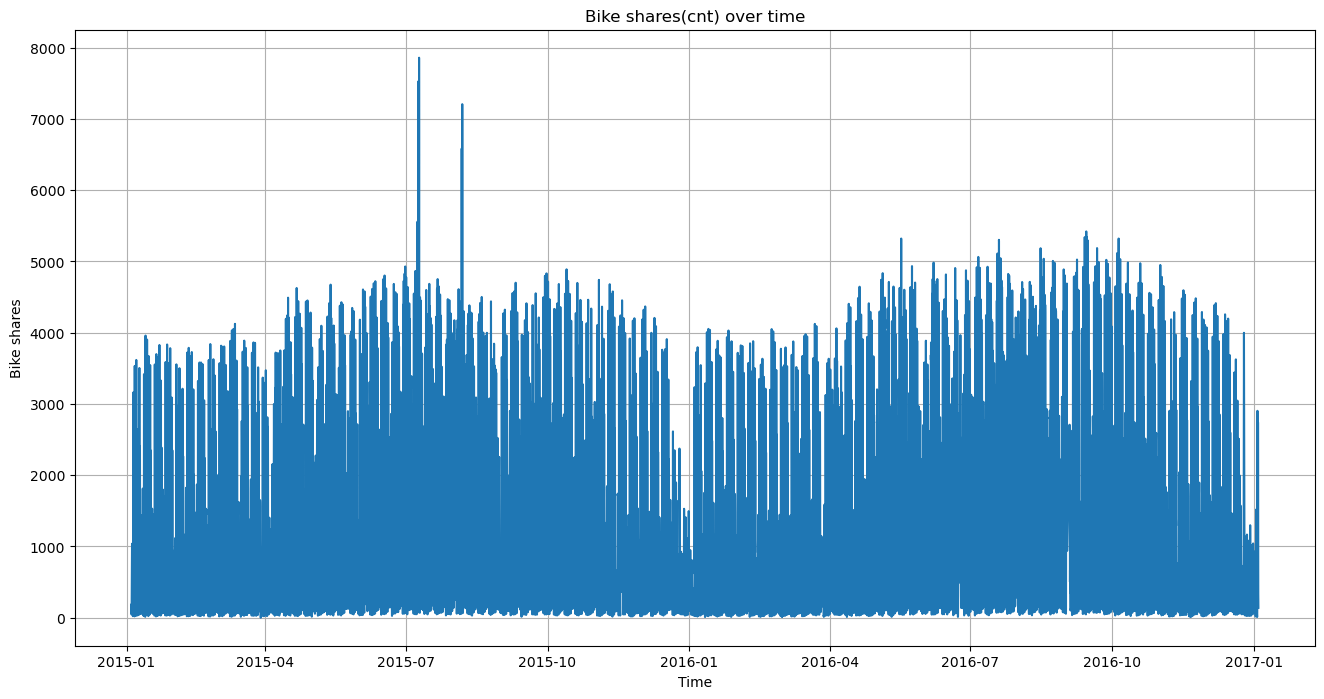

In [46]:
# OOM solution
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=df.index, y=df.cnt, ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Bike shares')
ax.set_title('Bike shares(cnt) over time')
ax.grid(True)
plt.show()

#During the summer of 2017, there were several days when the bike shares well exceeded the mean. 
#These exceptional days can be considered outliers.
#The start of 2016 marked the period with the lowest number of observed bike shares.

In [47]:
#let's try this lineplot quarterly and monthly.
#since the time is a daily value, the lineplot does not give a meaningful figure for the dataset

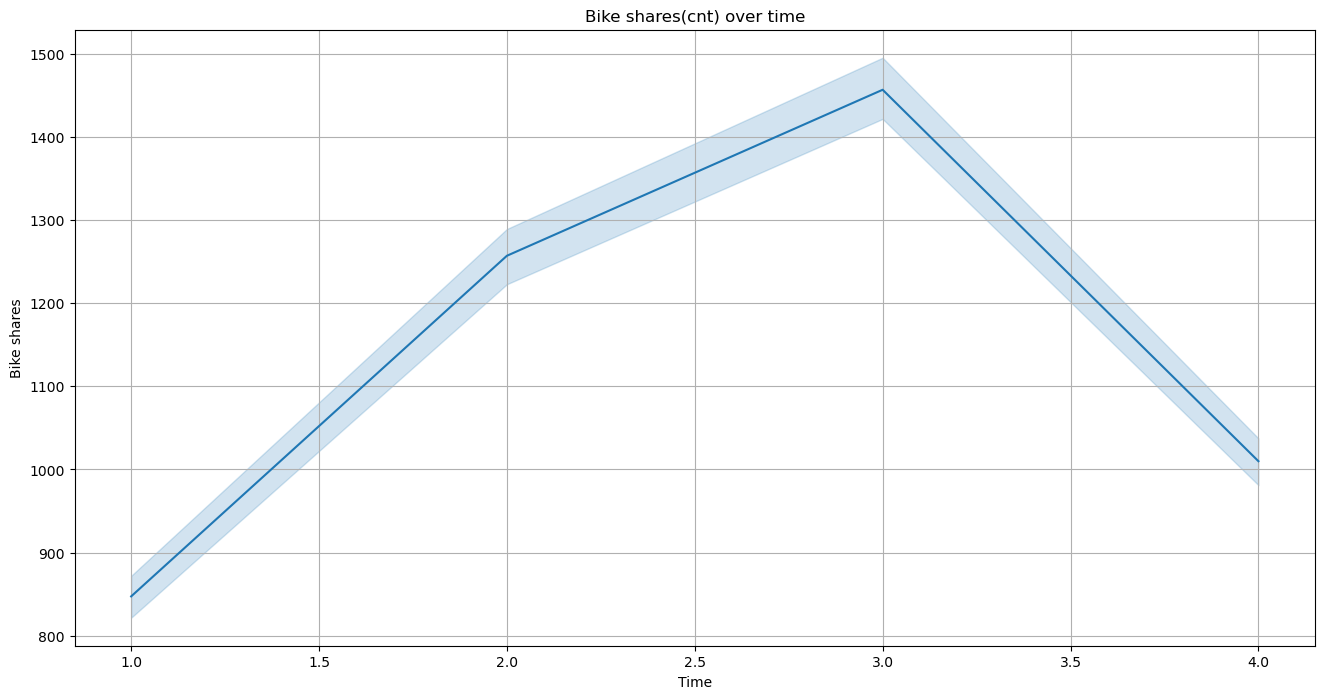

In [48]:
# by quarter

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=df.quarter, y=df.cnt, ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Bike shares')
ax.set_title('Bike shares(cnt) over time')
ax.grid(True)
plt.show()

# the most bike share has been observed during the third quarter cumulatively in 2015 and 2016
#this is an expected result since it corresponds to summer time

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [49]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015,1,Sunday,4,1,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter,2015,2,Sunday,4,1,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter,2015,3,Sunday,4,1,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter,2015,4,Sunday,4,1,1


In [50]:
#First we should add a column named year_of_month, including only year and month information

In [51]:
print(df.index.year)
# we can simply call the year from the index column with df1.index.year
#Because before we set timestamp as index

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)


In [52]:
print(df.index.month)
## we can simply call the month from the index column with df1.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='timestamp', length=17414)


In [53]:
df['year_of_month'] = df.index.year.astype(str) + '-' + df.index.month.astype(str)
#In order to add "-" between year and month, we should transform their types into str
#By assigning the column, we can add a new feature called "year_of_month".

In [54]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter,year_of_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1,2015-1


In [55]:
# First way

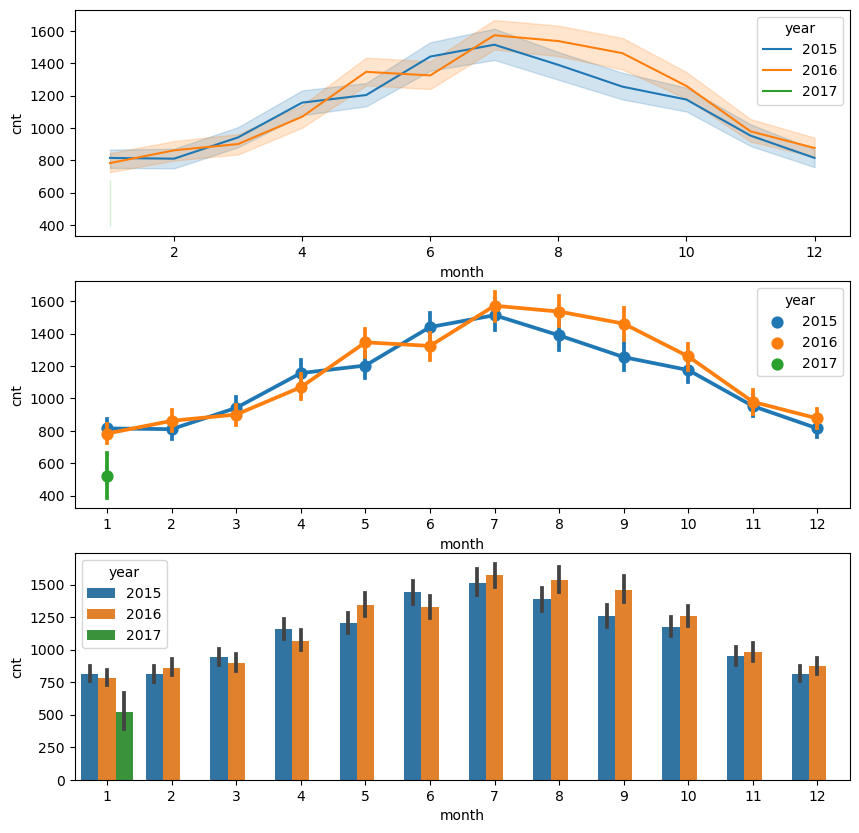

In [56]:
fig, ax = plt.subplots(3,1, figsize=(10,10))

sns.lineplot(data=df, x = "month", y="cnt",hue="year", ax =ax[0])
sns.pointplot(data=df, x = "month", y="cnt",hue="year", ax =ax[1])
sns.barplot(data=df, x = "month",y="cnt" ,hue="year", ax =ax[2])

plt.show();

In [57]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter,year_of_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1,2015-1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015,1,Sunday,4,1,1,2015-1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter,2015,2,Sunday,4,1,1,2015-1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter,2015,3,Sunday,4,1,1,2015-1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter,2015,4,Sunday,4,1,1,2015-1


In [62]:
# Second Way

In [76]:
df.drop(df[df['year'] == "2017"].index, inplace=True)

In [77]:
df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter,year_of_month
timestamp,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,493,9.0,6.0,82.0,17.0,Cloudy,Non-holiday,Weekend,Winter,2016,19,Saturday,31,12,4,2016-12
2016-12-31 20:00:00,465,8.5,6.5,84.5,13.0,Cloudy,Non-holiday,Weekend,Winter,2016,20,Saturday,31,12,4,2016-12
2016-12-31 21:00:00,474,8.0,6.0,87.0,12.0,Cloudy,Non-holiday,Weekend,Winter,2016,21,Saturday,31,12,4,2016-12
2016-12-31 22:00:00,587,8.0,6.0,90.0,12.0,Cloudy,Non-holiday,Weekend,Winter,2016,22,Saturday,31,12,4,2016-12
2016-12-31 23:00:00,697,8.0,5.0,87.0,18.5,Cloudy,Non-holiday,Weekend,Winter,2016,23,Saturday,31,12,4,2016-12


### a. lineplot 

In [78]:
# Plot bike shares by months and year_of_month (use lineplot).

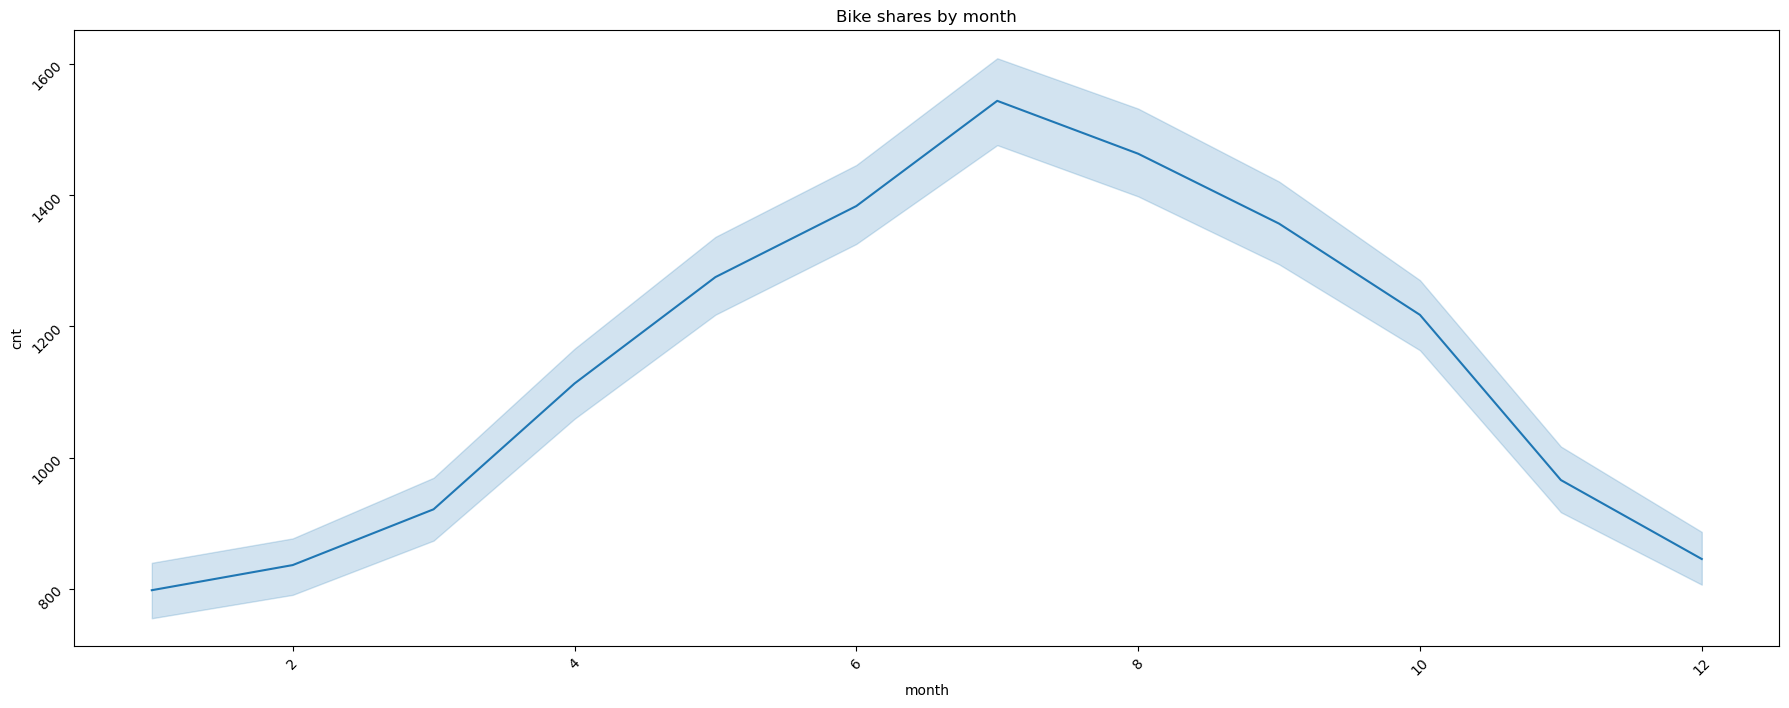

In [79]:
# OOM
fig, ax = plt.subplots(figsize=(22, 8))
sns.lineplot(x="month", y="cnt", data=df, ax=ax)
ax.set_title("Bike shares by month")
ax.tick_params(rotation=45) # or use plt.xticks()
plt.show()

# For OOM, we first define both the figure and the axis and define the figure size.
# For sns.lineplot, we define x, y, and dataframe in it 
# then we set the title with ax.set_title code
#the ticks for the x axis can be arranged with ax.tick_params in OOM method.

#In the graph, the bike shares are represented as the sum of all years by month. 
#The results indicate that, overall, the highest number of bikes are rented during the high season, particularly in mid-summer.
#The least bike shares occur during the winter time, the graph that resembles a normal distribution. 
#However, a slight left-skewness can be observed in the data.

** From this monthly line graphic, it is more clear that the most bikes were rented during the summer period.
** Since the beginning and the end of the year corresponds to the winter season, bike share considerably decreases.
** A slightly left-skeweness can be observed from the graphic, this can be because in London the beginning of the summer extends to July.

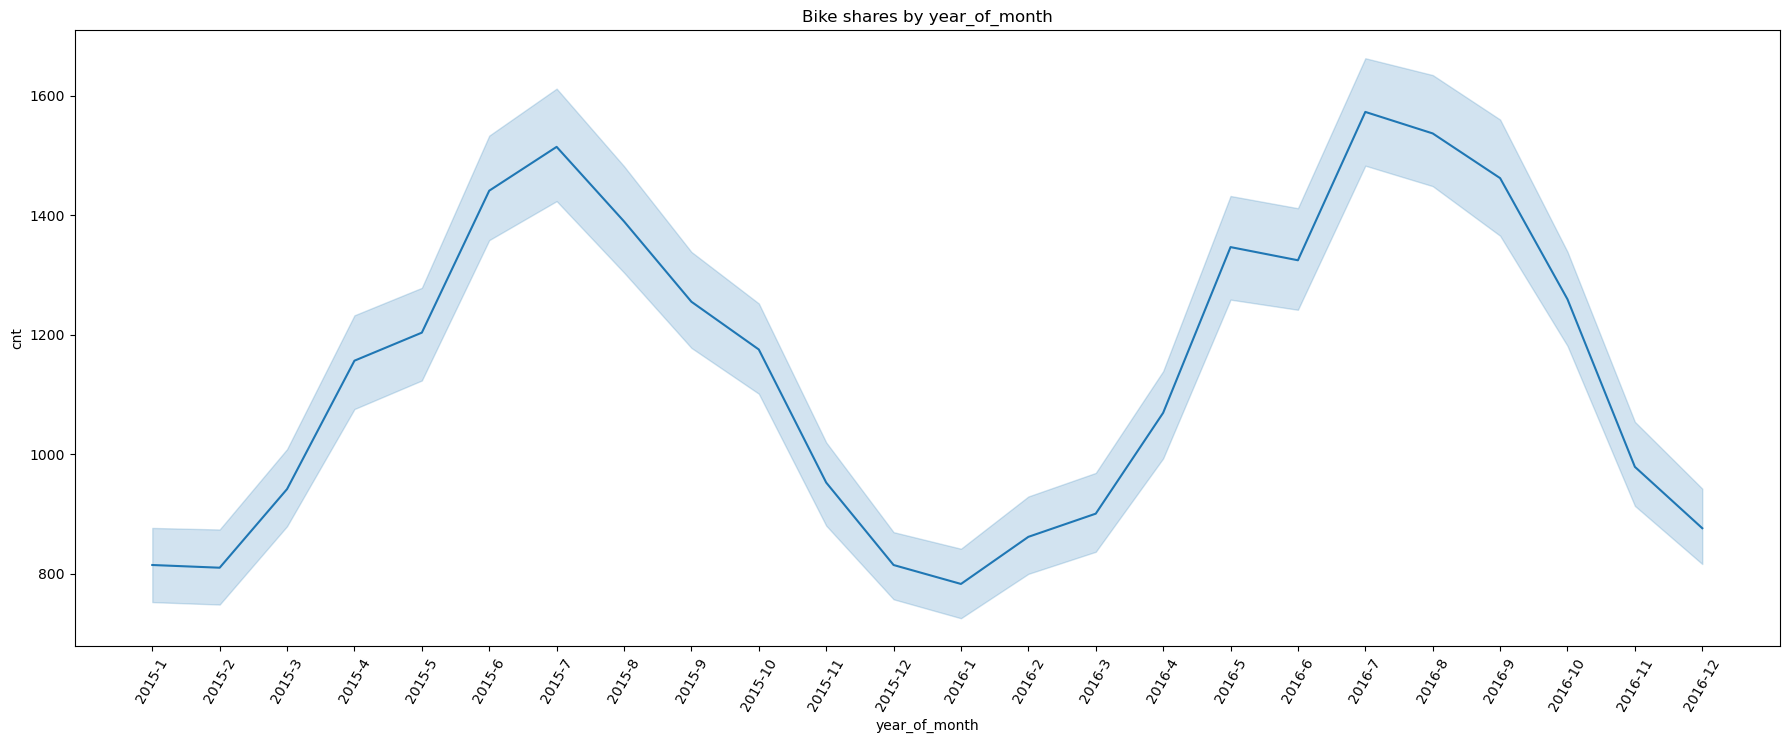

In [80]:
plt.figure(figsize = (22,8))
sns.lineplot(x = "year_of_month", y = "cnt", data = df)
plt.title("Bike shares by year_of_month")
plt.xticks(rotation = 60)
plt.show()

#When plotting the same graph over the "year_of_month" feature, 
#we observe two peaks in the graph, corresponding to the summer seasons. 
#Additionally, from the graph, we can infer that the bike shares during the winter season of 2016-2017 
#are significantly lower, compared to the winter season of 2014-2015.

# fig, ax = plt.subplots(figsize=(22, 8))
# sns.lineplot(x="year_of_month", y="cnt", data=df1, ax=ax)
# ax.set_title("Bike shares by year of month")
# ax.tick_params(rotation=45) # or use plt.xticks()
# plt.show()

### b. pointplot

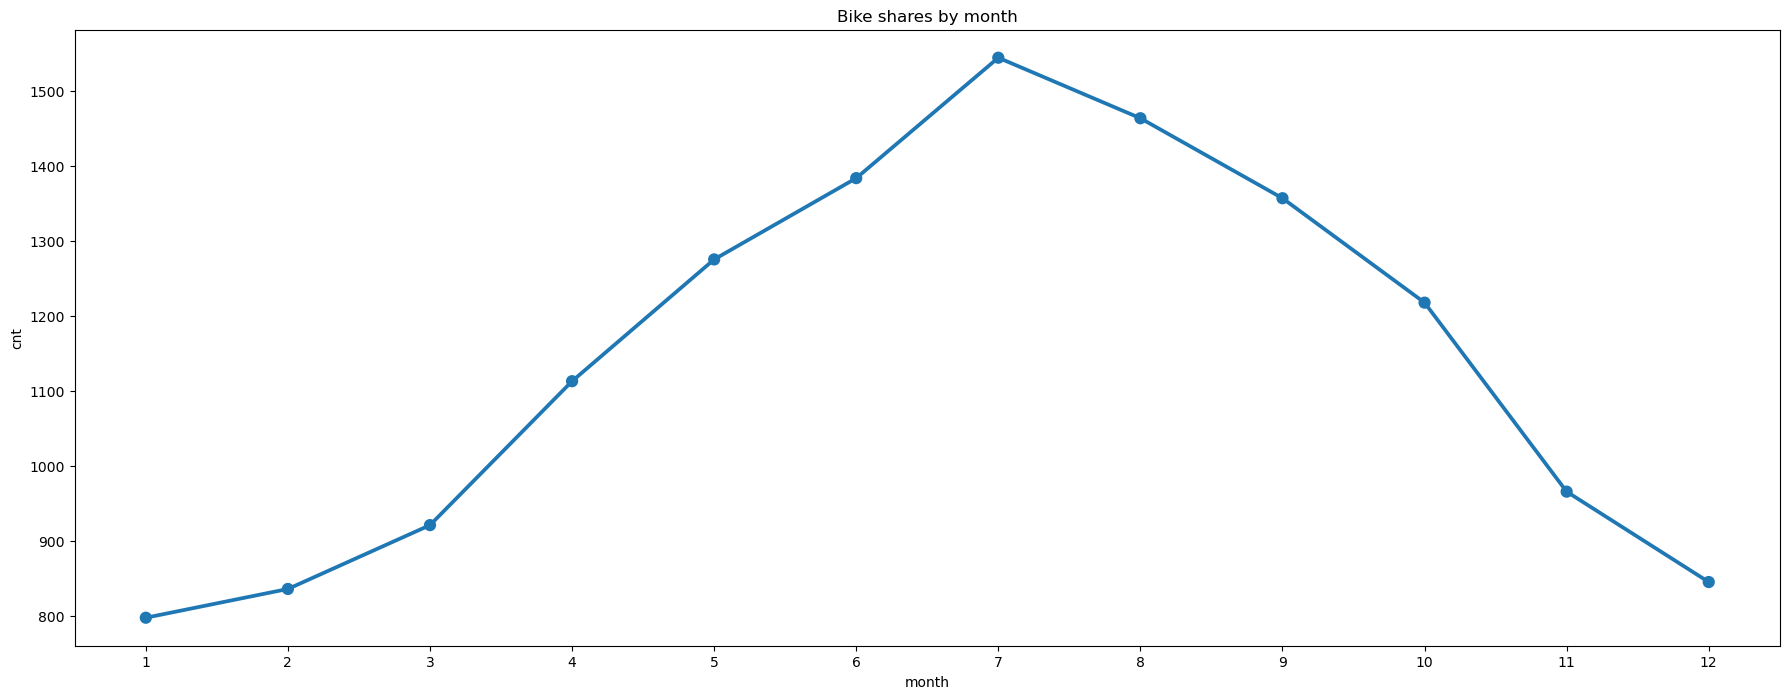

In [81]:
fig, ax = plt.subplots(figsize=(22, 8))
sns.pointplot(x="month", y="cnt", data=df, ax=ax,errorbar = None)
ax.set_title("Bike shares by month")
plt.show()


#Here we observe clearly that the high season is summer and the July is the month
#when the most number of bike shares are observed
#the data by month indicates the sum of all the years.

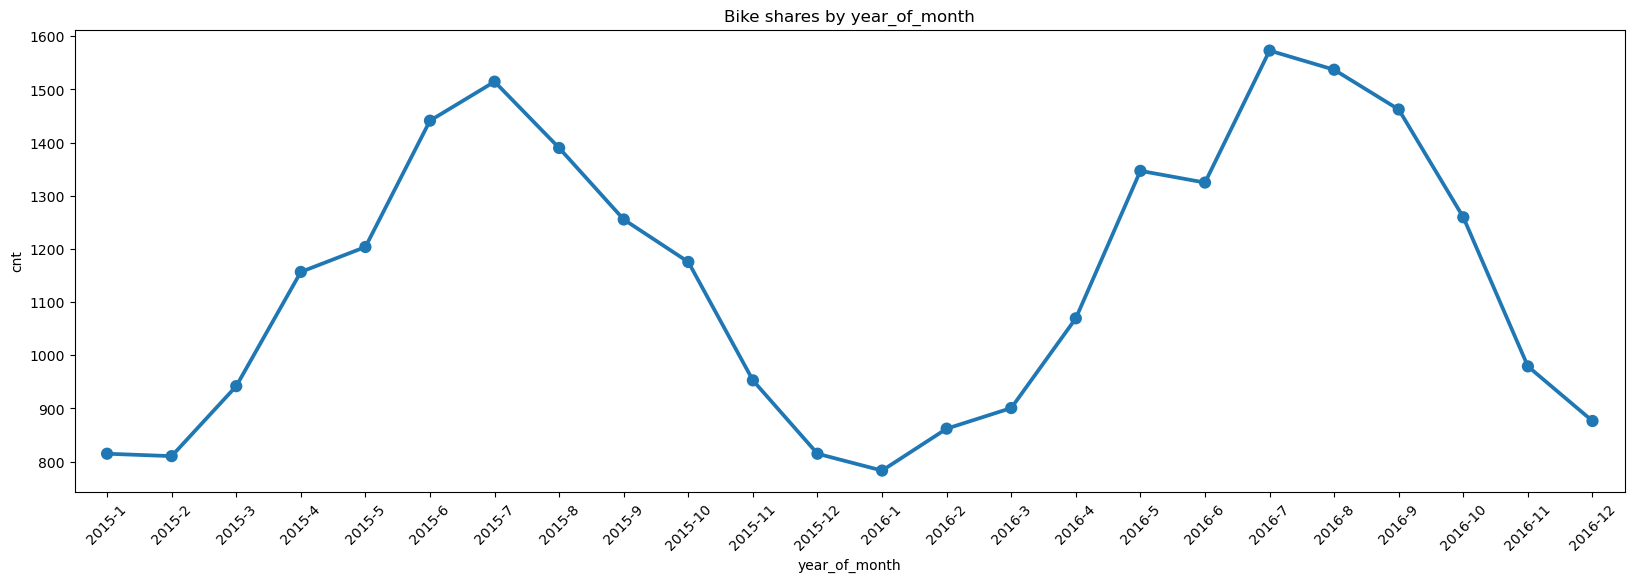

In [82]:
plt.figure(figsize = (20,6))
sns.pointplot(x = "year_of_month", y = "cnt", data = df,errorbar = None)
plt.title("Bike shares by year_of_month")
plt.xticks(rotation = 45) #rotation parameter in plt.xticks enable us read the long info in x axis 
plt.show()

# Here we also observe that July is the month when the most number of bike rentals are observed
#Maybe due to the severe winter conditions in January 2017, bike rentals consierably decreased

### c. barplot 

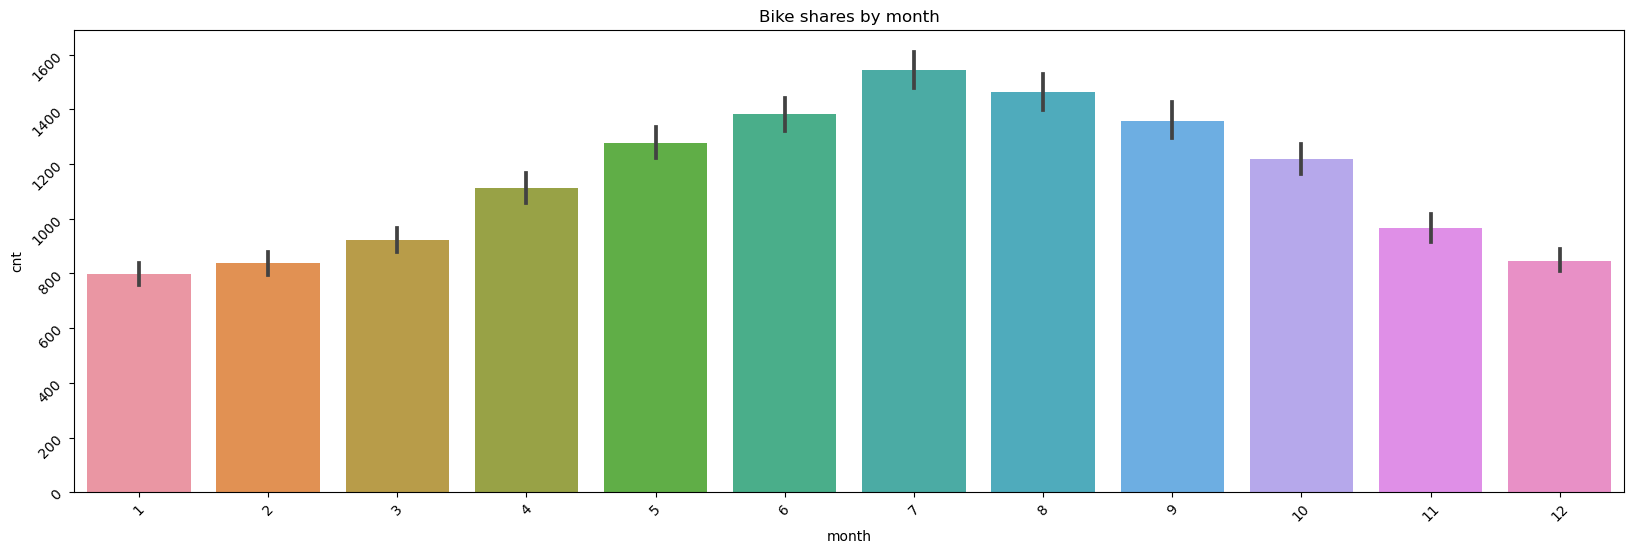

In [83]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x="month", y="cnt", data=df, ax=ax)
ax.set_title("Bike shares by month")
ax.tick_params(rotation=45)
plt.show()

# plt.figure(figsize = (20,6))
# sns.barplot(x = "month", y = "cnt", data = df1)
# plt.title("Bike Shares by Months")
# plt.xticks(rotation = 45)
# plt.show()

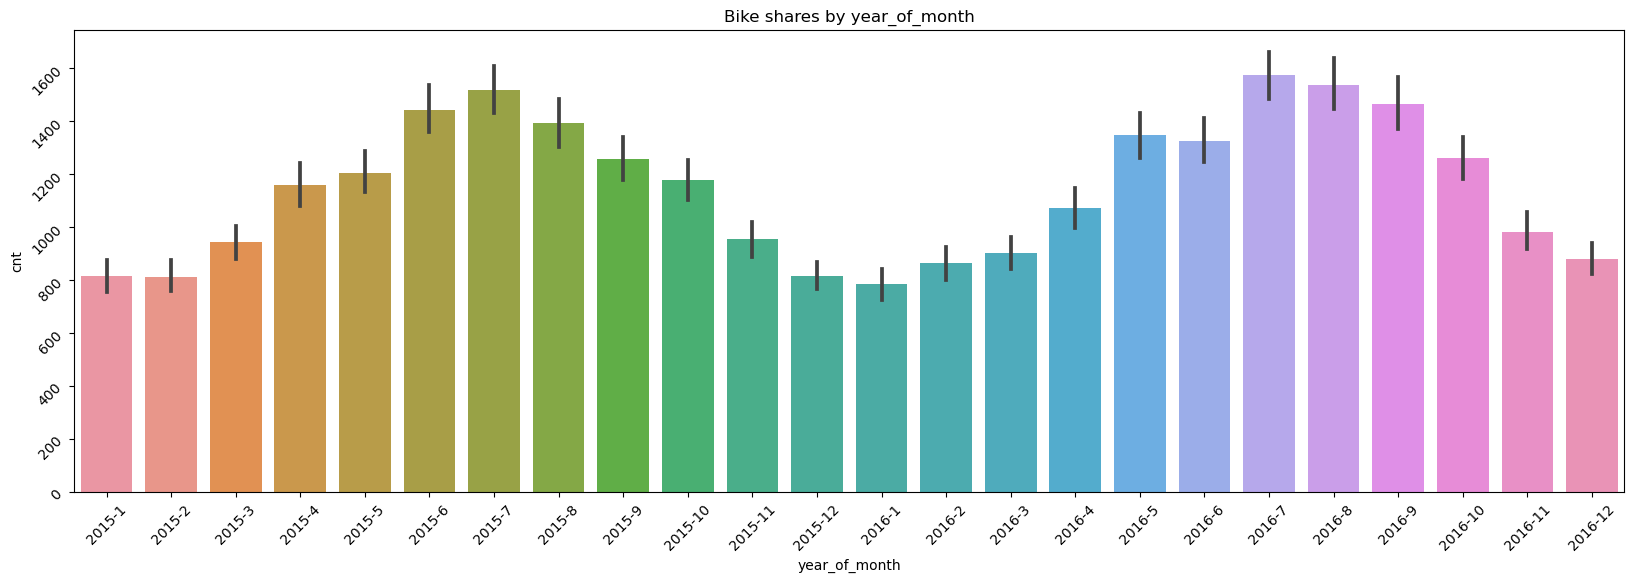

In [84]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x="year_of_month", y="cnt", data=df, ax=ax)
ax.set_title("Bike shares by year_of_month")
ax.tick_params(rotation=45)
plt.show()

# plt.figure(figsize = (20,6))
# sns.barplot(x = "year_of_month", y = "cnt", data = df1)
# plt.title("Bike Shares by Year of Months")
# plt.xticks(rotation = 45)
# plt.show()

From the the barplot, we can easily observe the two peaks in the summer season in both 2015 and 2016 
The ticks above the patches in the graphic represent the standard deviation. #Based on the graphic, 
it can be observed that the standard deviation during the high season is higher compared to other seasons. 
This implies that there is greater variability or dispersion in the bike shares during the peak summer months 
compared to other times of the year.

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

In [85]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter,year_of_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1,2015-1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015,1,Sunday,4,1,1,2015-1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter,2015,2,Sunday,4,1,1,2015-1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter,2015,3,Sunday,4,1,1,2015-1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter,2015,4,Sunday,4,1,1,2015-1


In [86]:
# we tried histplot, displot, barplot, and strip plot, but they didn't look as good.

# plt.figure(figsize=(10, 6))
# sns.stripplot(data=df1, x="hour", y="cnt", hue="is_holiday")
# plt.xlabel("Hour")
# plt.ylabel("Count")
# plt.title("Bike Shares by Hours on Holidays (Strip Plot)")
# plt.show()

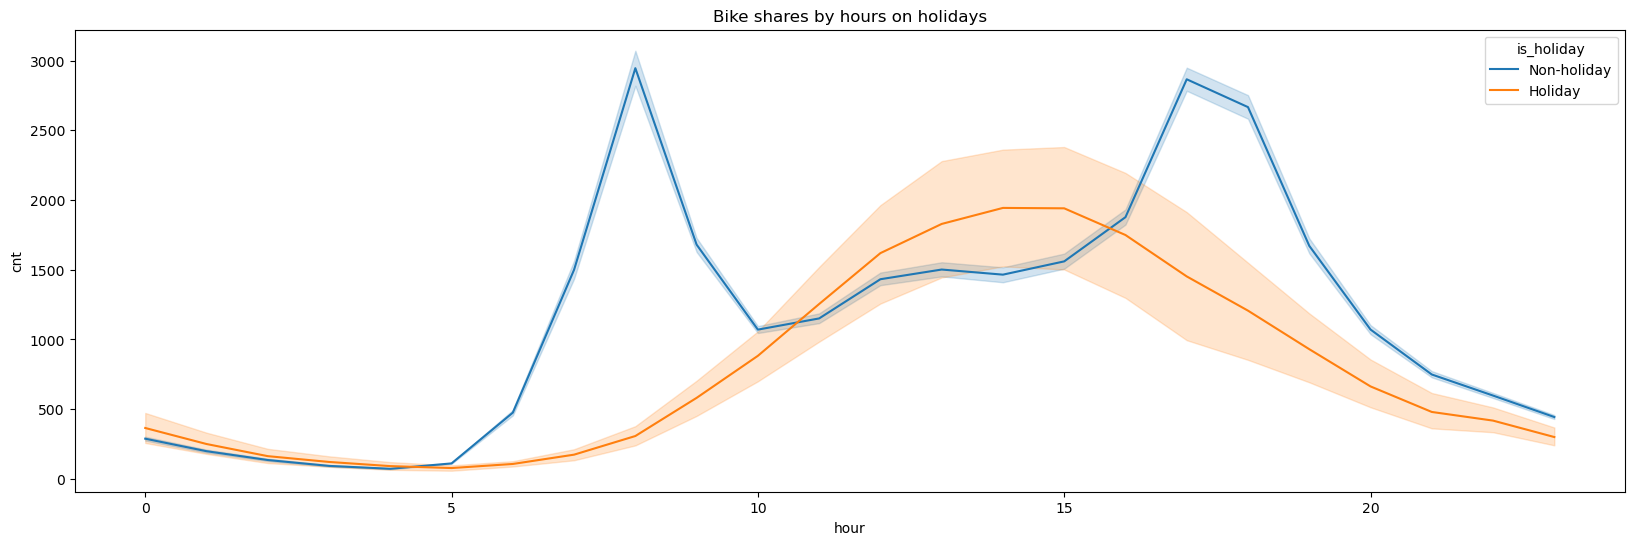

In [87]:
plt.figure(figsize = (20,6))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "is_holiday")
plt.title("Bike shares by hours on holidays")
plt.show()

# fig, ax = plt.subplots(figsize=(20, 6))
# sns.lineplot(x="hour", y="cnt", data=df1, hue = "is_holiday", ax=ax)
# ax.set_title("Bike shares by hours on holiday")
# plt.show()

According to the graphic, we can infer that on regular days, the bike share increases during morning and evening hours. 
This suggests that people tend to use bikes when commuting to and from work.
However, during holidays, the peak hours shift to the period between 14:00 and 16:00, 
indicating that bike rentals during this time are more for leisurely travel rather than commuting purposes.

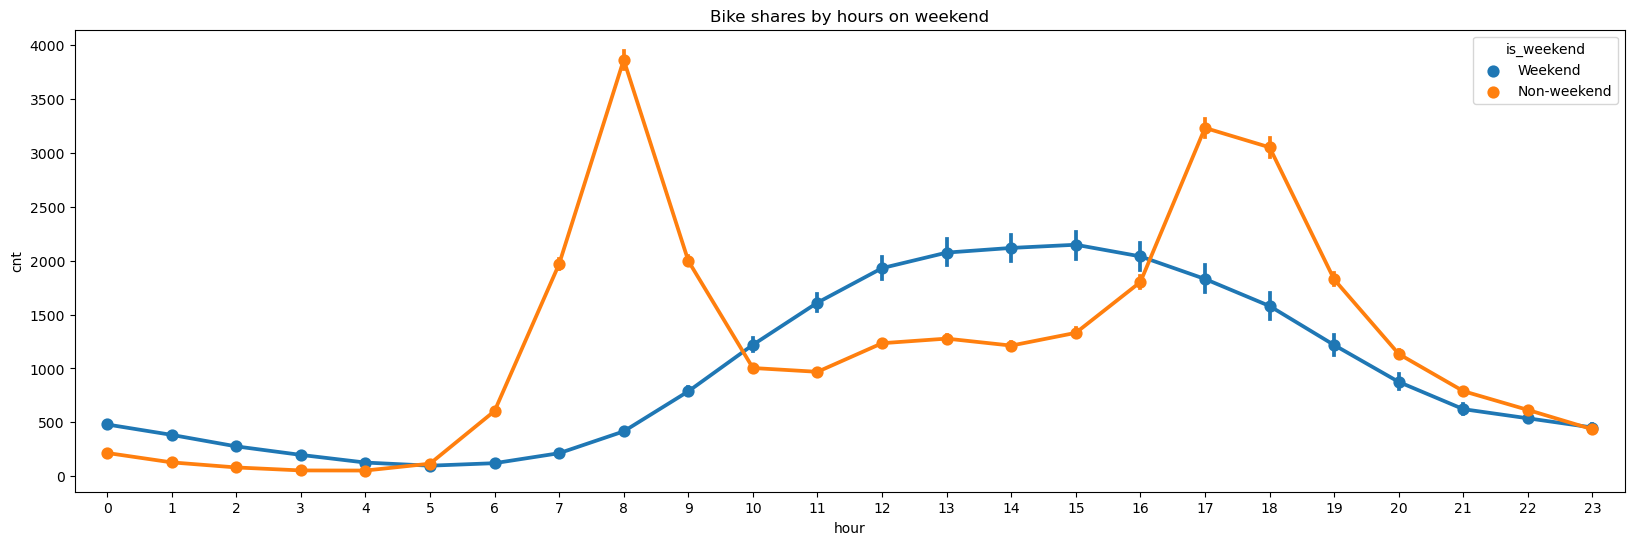

In [73]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.pointplot(x="hour", y="cnt", data=df, hue = "is_weekend", ax=ax)
ax.set_title("Bike shares by hours on weekend")
plt.show()

According to the graphic, similar to holiday or not insight, in weekdays the bike share increases during morning and 
evening hours. This suggests that people tend to use bikes when commuting to and from work.
However, during weekend, the peak hours shift to the period between 14:00 and 16:00,
indicating that bike rentals during this time are more for leisurely travel rather than commuting purposes.

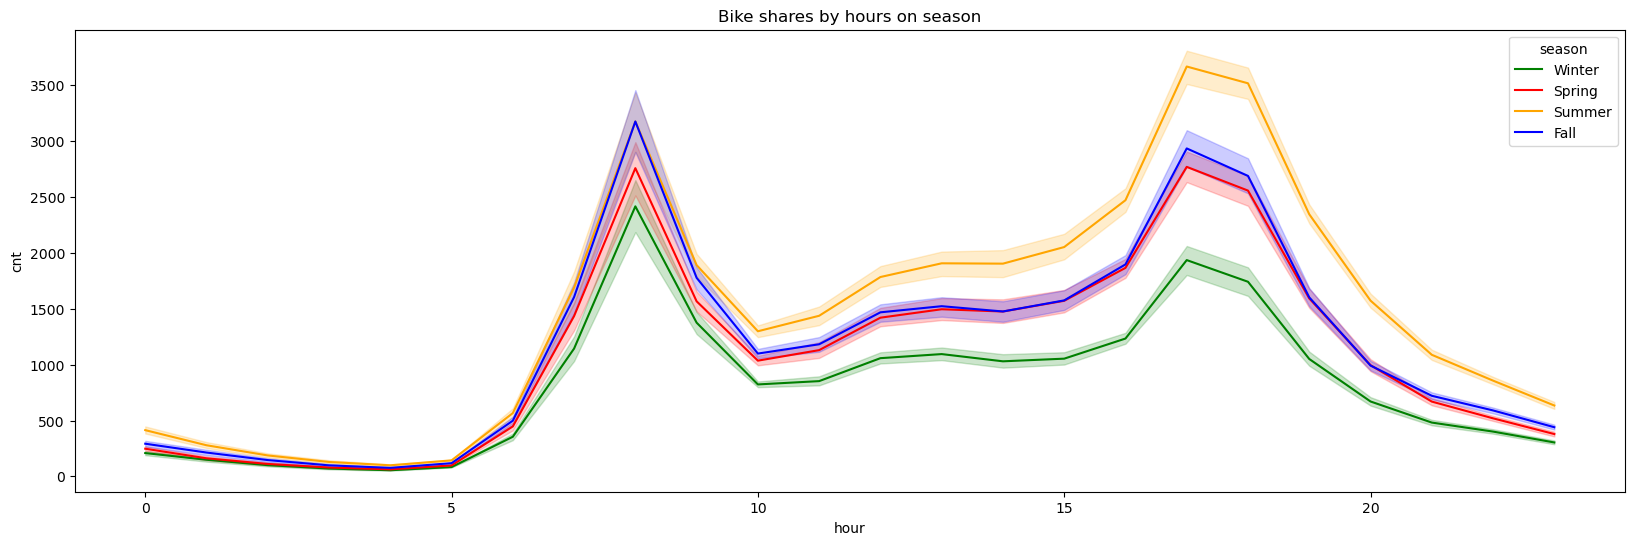

In [74]:
season_colors = ["green","red" ,"orange", "blue"]

fig, ax = plt.subplots(figsize=(20, 6))

# Set the `palette` parameter to the list of colors
sns.lineplot(x="hour", y="cnt", data=df, hue="season", ax=ax, palette=season_colors)

ax.set_title("Bike shares by hours on season")
plt.show()

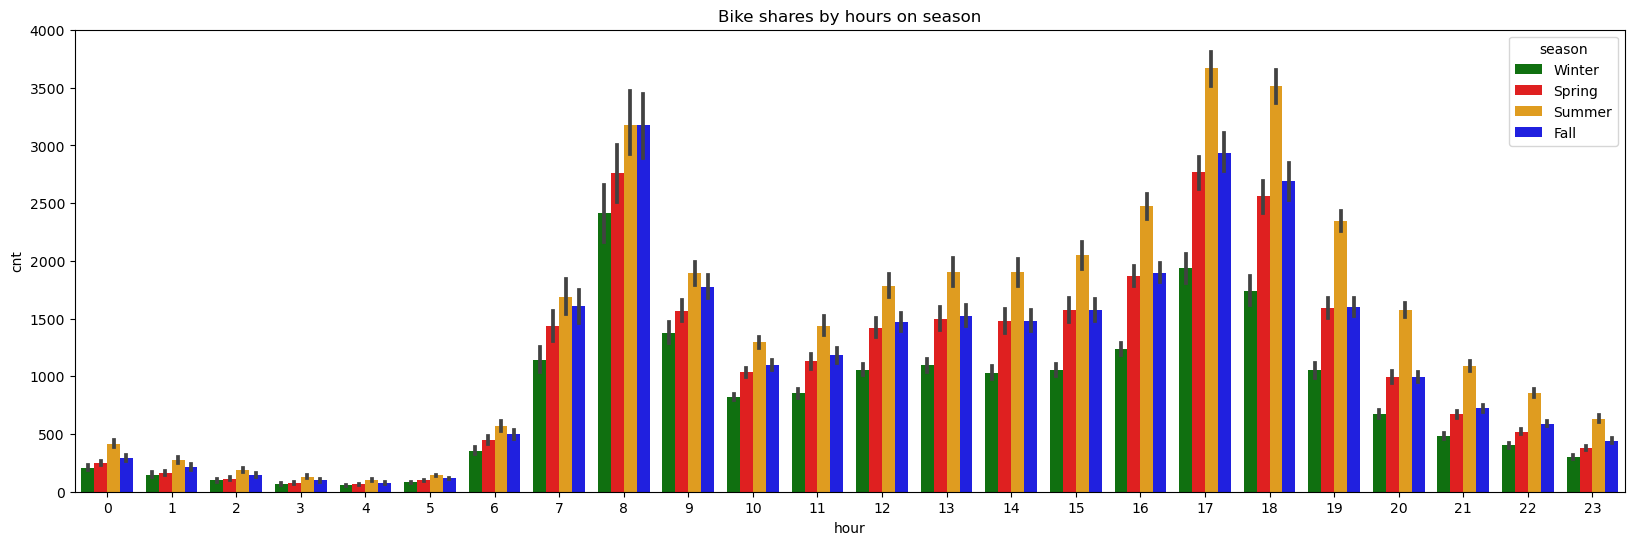

In [75]:
season_colors = ["green","red" ,"orange", "blue"]

fig, ax = plt.subplots(figsize=(20, 6))

# Set the `palette` parameter to the list of colors
sns.barplot(x="hour", y="cnt", data=df, hue="season", ax=ax, palette=season_colors)

ax.set_title("Bike shares by hours on season")
plt.show()

According to the graphic, we can infer that in each season, the bike share increases during morning and evening hours. 
This suggests that people tend to use bikes when commuting to and from work. 
the morning hours are intensified between 7-9 am the evening hours are intensified between 16:00 and 18:00. 
it shows us the domination of IT sector :)

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

In [76]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter,year_of_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1,2015-1


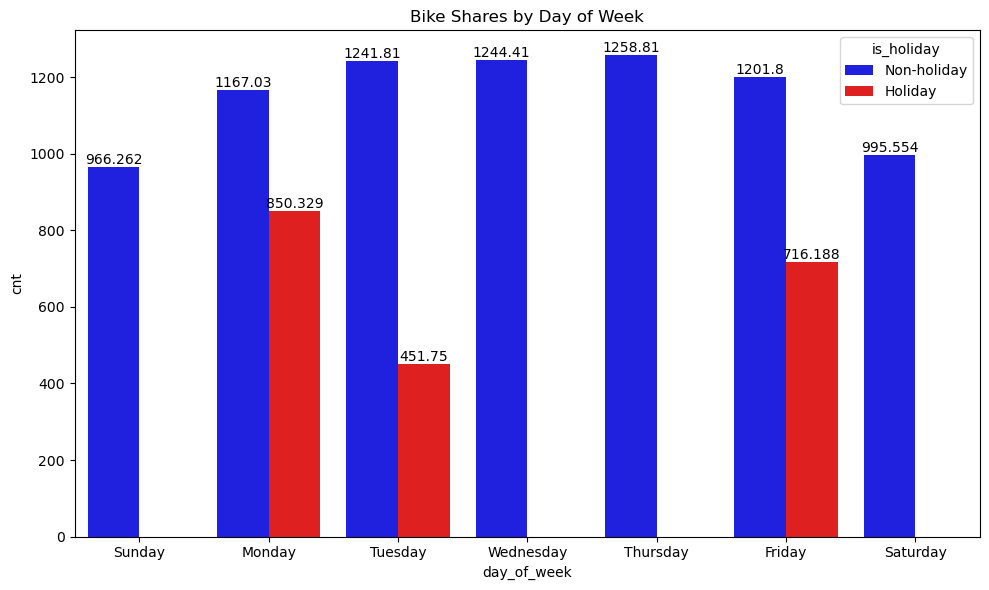

In [88]:
holiday_colors = ["blue","red"]
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_holiday", ci = False,palette = holiday_colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Bike Shares by Day of Week")
plt.tight_layout()
plt.show()

Since the weekends are already considered holidays, the "is_holiday" variable only determines weekdays as categorical data.
When holidays fall on Mondays or Fridays, bike rentals increase. 
One possible insight that can be derived from this is that people may take advantage of long weekends to visit London. 
Based on the graph, it appears that if the holiday falls on a Wednesday or Thursday, 
it does not significantly affect bike sharing.

Based on the graph, it appears that if the holiday falls on a Wednesday or Thursday,
it does not significantly affect bike sharing.
when we check the official holidays in 2015 and in 2016 in UK from web, we understand that the holidays are concentrated on Mondays and Fridays in particular in these years. There are two holidays coinciding to Thursday in 2016, Wedsndays are not fall in any of official holidays in either 2015 or 2016. Therefore, the reason of increased bike shares in mondays and fridays might also be the number of official holidays intensified in mondays and fridays.

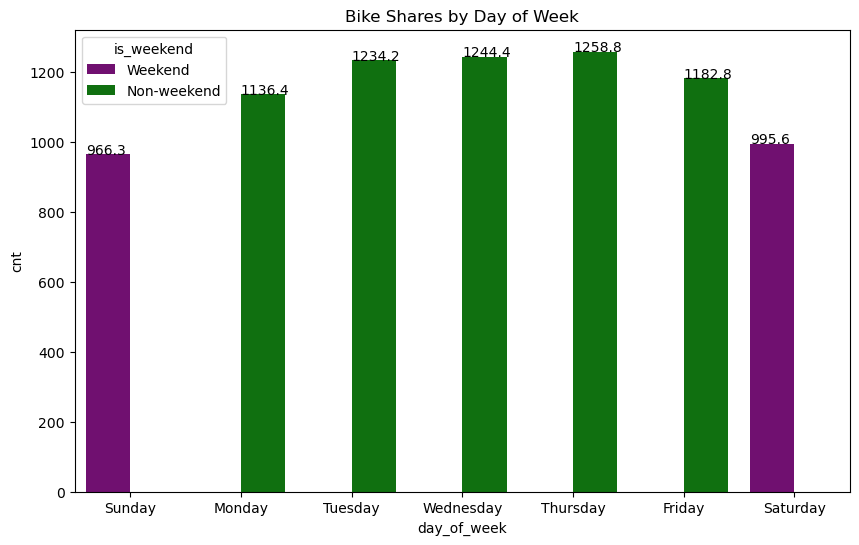

In [89]:
week_colors = ["purple","green"]
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x="day_of_week", y="cnt", hue="is_weekend", ci=False, palette = week_colors)
plt.title("Bike Shares by Day of Week")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

The bike rental rates for the weekends, specifically Saturdays and Sundays, are very close to each other 
but lower than those of weekdays. From this, 
one possible conclusion that can be drawn is that people prefer to relax at home rather than renting bikes during the weekends, 
or they may primarily use bikes for commuting purposes during the weekdays.

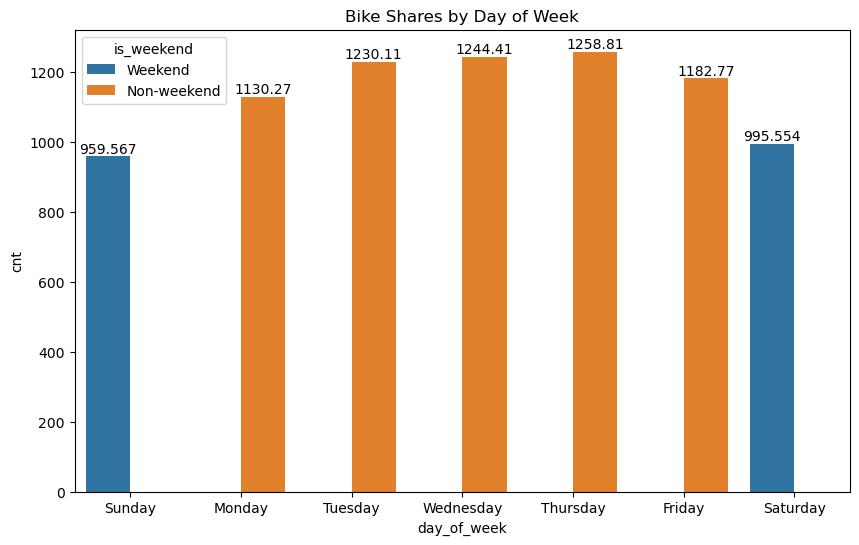

In [79]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_weekend", ci = False)
plt.title("Bike Shares by Day of Week")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

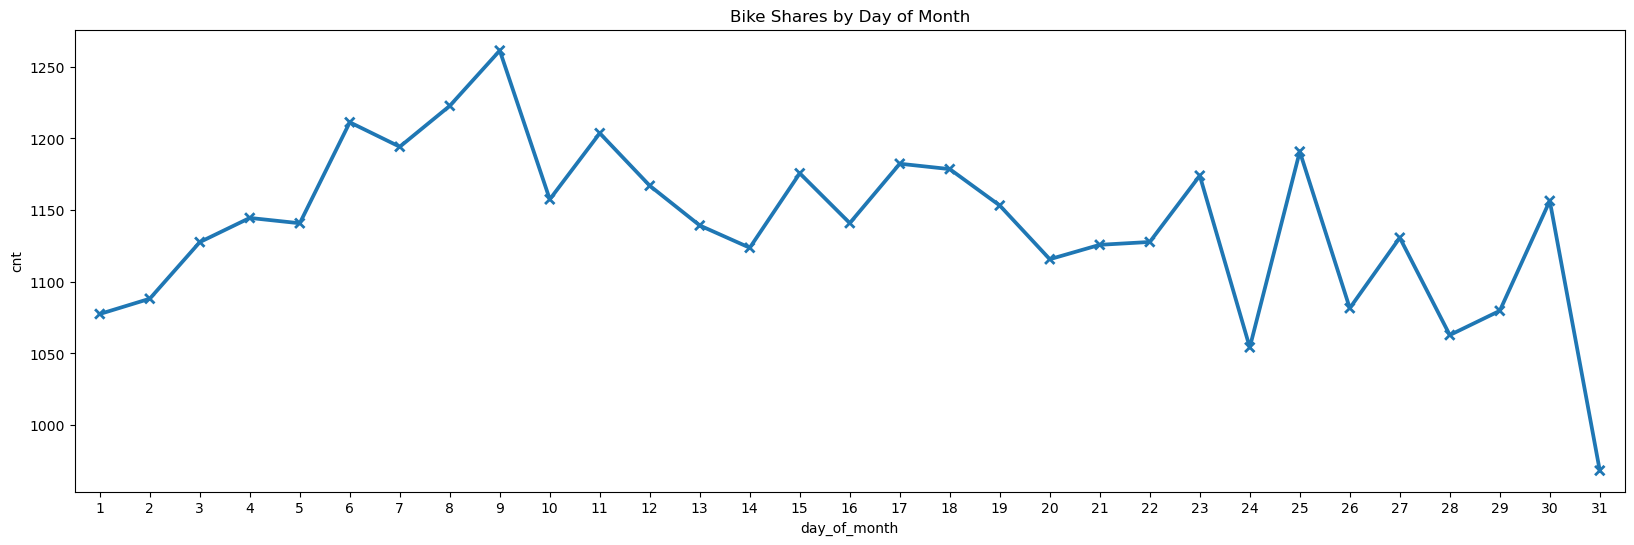

In [80]:
plt.figure(figsize=(20,6))
sns.pointplot(data = df, x = "day_of_month", y = "cnt", markers = "x",errorbar = None)
plt.title("Bike Shares by Day of Month")
plt.show()

# fig, ax = plt.subplots(figsize=(20, 8))
# sns.pointplot(x="day_of_month", y="cnt", data=df1)
# ax.set_title("Bike shares by Day of month")
# plt.show()

It may not be possible to draw highly significant conclusions from this, 
but it can be observed that the bike share increases during the first nine days of the month and fluctuates afterward. 
The reason for the lowest bike share on the 24th day of the month could be attributed to Christmas, 
as people spend time with their families rather than renting bikes for leisurely activities. 
Similarly, the lower bike share on the 31st day of the month could be due to the varying lengths of different months, 
with some having 30 days and others having 31.

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

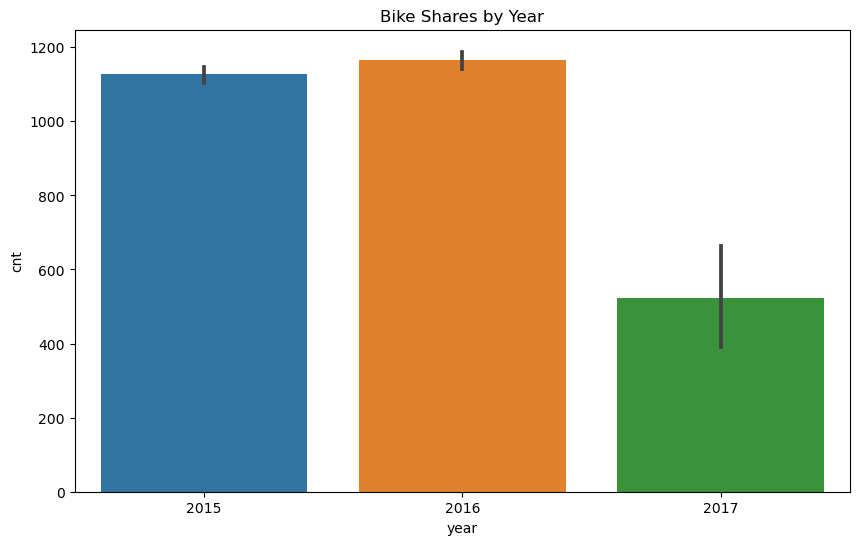

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "year", y = "cnt")
plt.title("Bike Shares by Year")
plt.show()

In 2016, the bike share has slightly increased compared to 2015. However, the reason for 2017 appearing significantly lower is due to the availability of data only for January in 2017.

In [82]:
# Plot bike shares on holidays by seasons

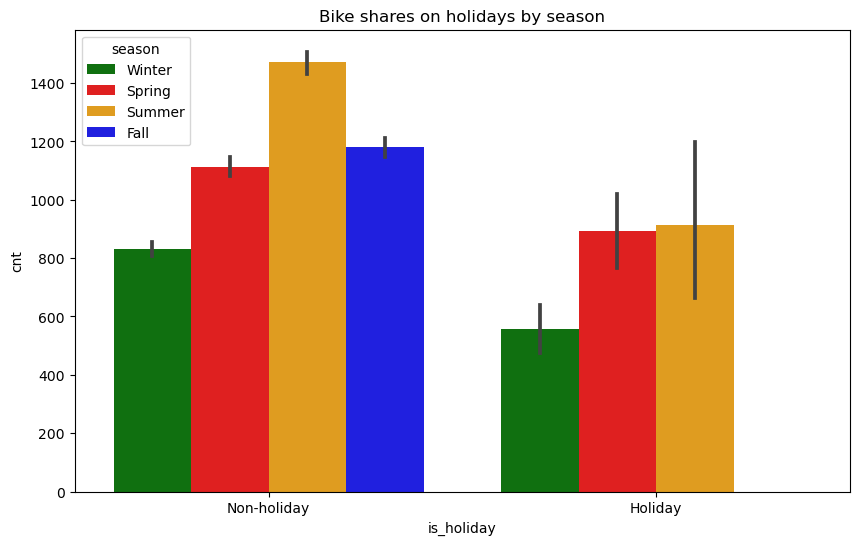

In [83]:
season_colors = ["green","red" ,"orange", "blue"]
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="is_holiday", y="cnt", data=df,hue = "season",palette=season_colors)
ax.set_title("Bike shares on holidays by season")
plt.show() 

# 1 holiday / 0 non holiday
# 0-spring ; 1-summer; 2-fall; 3-winter

# plt.figure(figsize=(10,6))
# sns.barplot(data = df1, x = "is_holiday", y = "cnt", hue = "season")
# plt.title("Bike Shares on Holidays by Seasons")
# plt.show()

On holidays, the bike share is lower compared to non-holiday days. One reason for this, as mentioned in a previous graph, is that people primarily use bike rentals for commuting purposes. If holidays fall during the autumn season, very few bikes are rented. This is most likely due to Thanksgiving coinciding with the autumn season, resulting in fewer bike rentals during that time.

Furthermore, people have preferred to rent bikes more during the summer, regardless of whether it is a holiday or not.

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [84]:
df_pie = df.groupby(['is_weekend'])["cnt"].count().reset_index()
df_pie

,is_weekend,cnt
0,Non-weekend,12444
1,Weekend,4970


In [85]:
df_pie.value_counts().index

MultiIndex([('Non-weekend', 12444),
            (    'Weekend',  4970)],
           names=['is_weekend', 'cnt'])

In [86]:
# Soltion by counts 

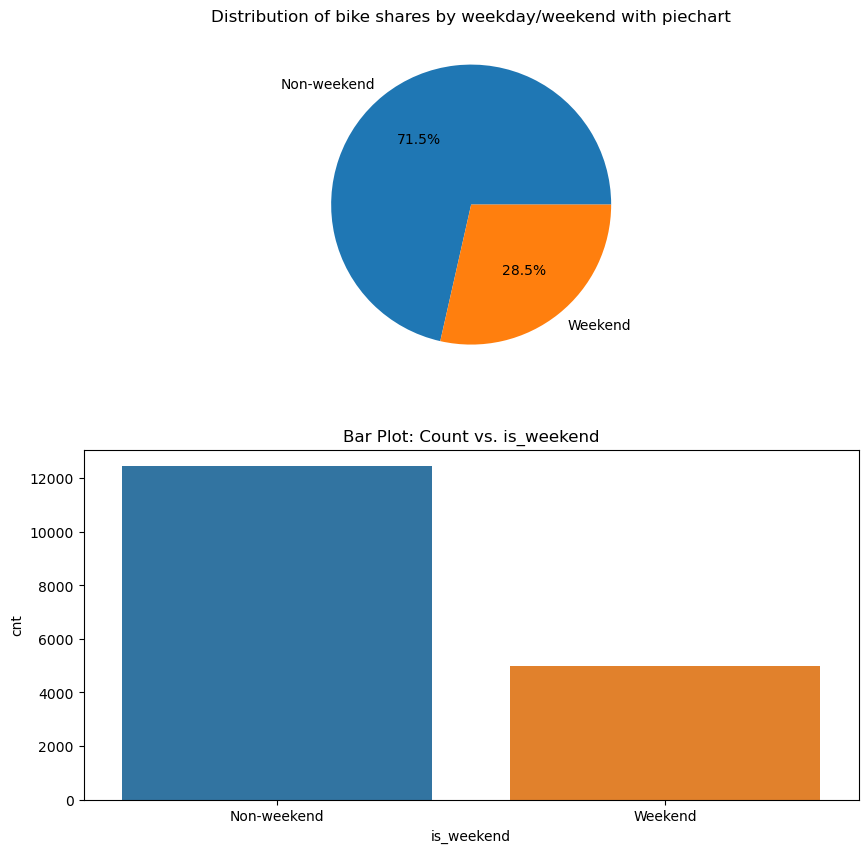

In [87]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Pie chart
ax[0].pie(x=df_pie.cnt, labels=df_pie.is_weekend, autopct='%1.1f%%')
ax[0].set_title('Distribution of bike shares by weekday/weekend with piechart')

sns.barplot(data=df_pie, x="is_weekend", y="cnt", ax=ax[1])
ax[1].set_title('Bar Plot: Count vs. is_weekend')

# Display the plots
plt.show()


In [88]:
# Solution by sum

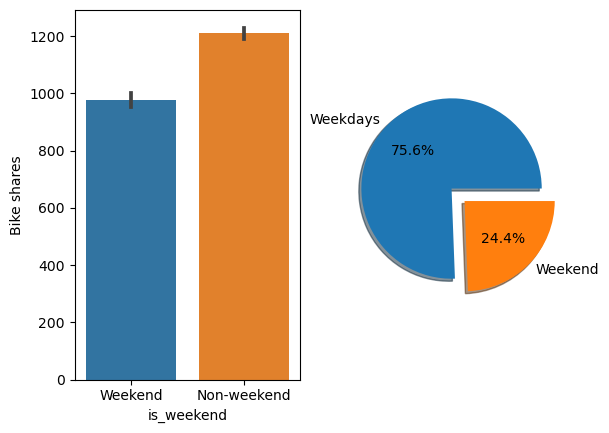

In [89]:
plt.subplot(121)
sns.barplot(data=df, x='is_weekend', y='cnt')
plt.ylabel("Bike shares")
plt.subplot(122)
plt.pie(df.groupby('is_weekend')['cnt'].sum(), explode = [0.1,0.1], labels=["Weekdays","Weekend"], autopct='%1.1f%%', shadow = True)
plt.show()

As previously mentioned in earlier graphs, it can be inferred that people tend to rent bikes more on weekdays, most likely for commuting purposes.

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

In [90]:
# tried with kde and histplot, but didn't look good.

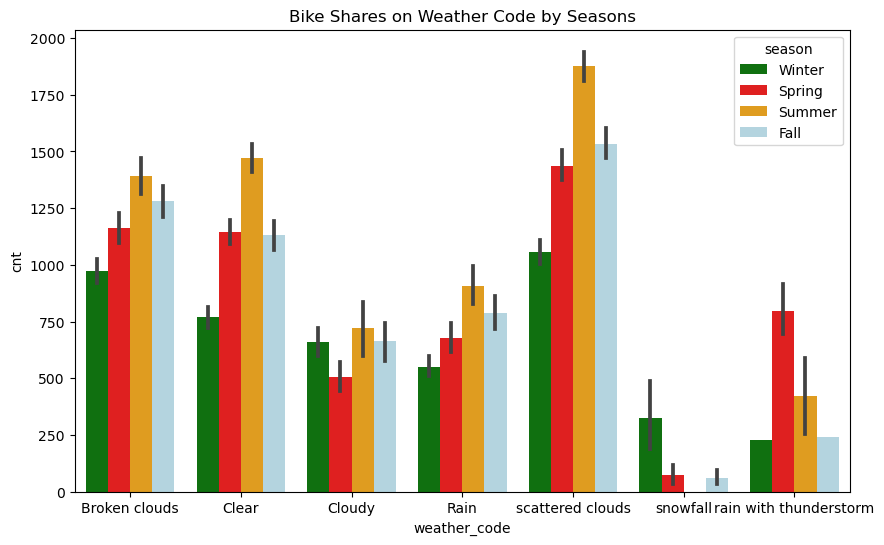

In [96]:
season_colors = ["green","red" ,"orange", "#ADD8E6"]
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "weather_code", y = "cnt", hue = "season",palette=season_colors)
plt.title("Bike Shares on Weather Code by Seasons")
plt.show()

# fig, ax = plt.subplots(figsize=(10, 6))
# sns.barplot(x="weather_code", y="cnt", data=df1,hue = "season")
# ax.set_title("Bike shares on weather code by season")
# plt.show()

People tend to prefer renting bikes more during the summer, especially on days with scattered clouds or broken clouds. One possible reason for this could be that on sunny days, they may opt for other transportation options such as the metro or car to avoid sweating during their commute. However, even on clear days, the bike rental rate is higher compared to rainy, snowy, or freezing days.

In [90]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,hour,day_of_week,day_of_month,month,quarter,year_of_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015,0,Sunday,4,1,1,2015-1


In [92]:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

The results indicate that:
1. from the graphics, it can be inferred that people tend to rent bikes more on weekdays, most likely for commuting purposes.
2. people tend to use bikes when commuting to and from work. The morning hours are intensified between 7-9 am the evening hours are intensified between 16:00 and 18:00.
3. The bike rental rates for the weekends, specifically Saturdays and Sundays, are very close to each other  but lower than those of weekdays. From this, one possible conclusion that can be drawn is that people prefer to relax at home rather than renting bikes during the weekends, or they may primarily use bikes for commuting purposes during the weekdays.
4. Overall, the highest number of bikes are rented during the high season, particularly in mid-summer. however while people prefer to go to work in the mornings by bike, they may prefer to come back by other transportation vehicles especialy during the winter season. Thus, the bike shares for commuting purposes are less sensitive to seasons in the morning, this date becomes more sensitive to seasonal factors in the evening
5. Furthermore people tend to prefer renting bikes more during the summer, especially on days with scattered clouds or broken clouds. One possible reason for this could be that on sunny days, they may opt for other transportation options such as the metro or car to avoid sweating during their commute. However, even on clear days, the bike rental rate is higher compared to rainy, snowy, or freezing days.
6. Lastly, from the analysis it appears that if the holiday falls on a Wednesday or Thursday, it does not significantly affect bike sharing. when we check the official holidays in 2015 and in 2016 in UK from web, we understand that the holidays are concentrated on Mondays and Fridays in particular in these years. There are two holidays coinciding to Thursday in 2016, Wedsndays are not fall in any of official holidays in either 2015 or 2016. Therefore, the reason of increased bike shares in mondays and fridays might be the number of official holidays inensified in mondays and fridays.  another reason might be the effect of long weekends encouraging peole to rent bikes in London for touristic purposes.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

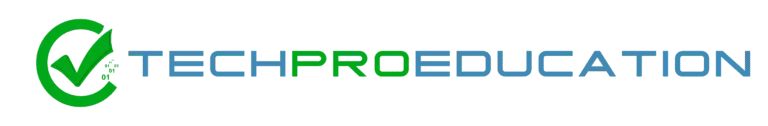